<a href="https://colab.research.google.com/github/HayateSato/DS_Practice/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some bacis notes

```
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],
        color='b', marker='o', linestyle='--')
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],
        color='r', marker='v', linestyle='--')

```





- Adding Markers:
 "o" for circles and "v" for downward-pointing triangles.
- Line Styles:
 "-" for solid line, "--" for dashed lines,
- Colors:
 'b' for blue and 'r' for red
- Axis Labels and Titles:
```
ax.set_xlabel("Time (months)")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather patterns in Austin and Seattle")
```

Time series

In [1]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

csv_url = "https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/3b53e75d1ddb97bd98f40ae5bbee2475_climate_change.csv"


csv_file = pd.read_csv(csv_url,
                      #  parse_dates=["Year"], ### parse_dates will convert the specified col into dates format
                      #  index_col="Year"
                       )


print(csv_file.shape)
print(csv_file.head(3))
# print(csv_file.columns.tolist())
print(csv_file.info())


(308, 11)
   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp   

In [9]:
csv_file["year-month"] = csv_file["Year"].astype(str) + '-' + csv_file["Month"].astype(str)
csv_file["year-month"] = pd.to_datetime(csv_file["year-month"])
csv_file.set_index("year-month", inplace=True)
csv_file.drop(columns=["Year", "Month"], inplace=True)
csv_file.head()
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1983-05-01 to 2008-12-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEI       308 non-null    float64
 1   CO2       308 non-null    float64
 2   CH4       308 non-null    float64
 3   N2O       308 non-null    float64
 4   CFC-11    308 non-null    float64
 5   CFC-12    308 non-null    float64
 6   TSI       308 non-null    float64
 7   Aerosols  308 non-null    float64
 8   Temp      308 non-null    float64
dtypes: float64(9)
memory usage: 24.1 KB


In [ ]:
# csv_file[:, "year-month"] =

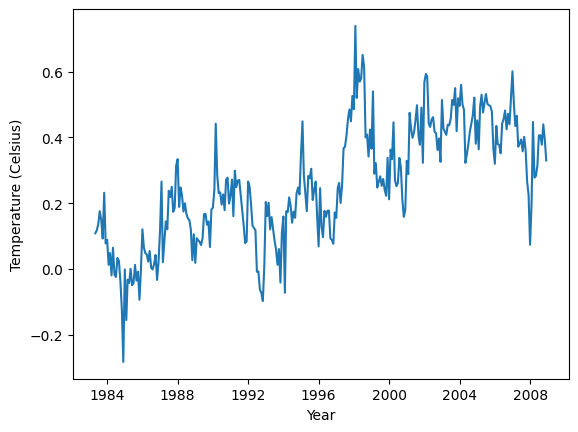

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # or ax = plt.axes()

ax.plot(csv_file.index, csv_file["Temp"]) # if index is time-series, you can just use as x axis

ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")

plt.show()

Zooming in 90s

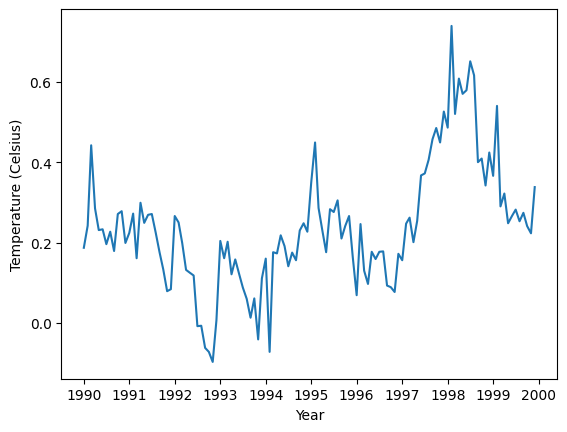

In [11]:
fig, ax = plt.subplots()
nineties = csv_file["1990":"1999"]

ax.plot(nineties.index, nineties["Temp"])
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")
plt.show()

Plotting two different y axis

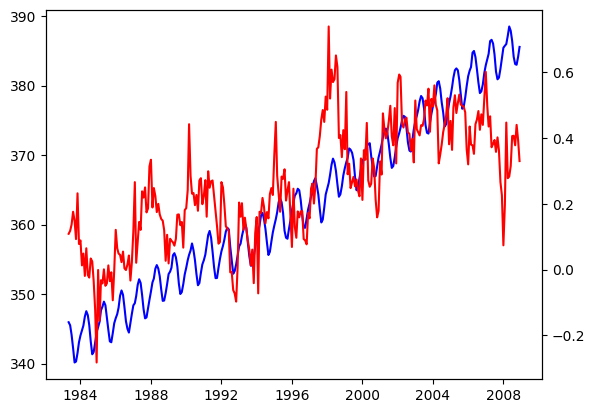

In [14]:

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(csv_file.index, csv_file["CO2"], color="b")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(csv_file.index, csv_file["Temp"], color="r")

plt.show()